In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
from tensorflow.keras.preprocessing import image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow import keras
from tensorflow.keras import layers
import keras.layers
import cv2
import os
from sklearn.model_selection import train_test_split
# from skimage.io import imread

In [ ]:
#initializing the cnn
model=Sequential()

In [ ]:
#part2-fitting the cnn to the images
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Generating images for the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Creating training set
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/binary_classification/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
# Creating the Test set
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/binary_classification/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 607 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


In [ ]:
training_set.class_indices

{'earwax': 0, 'normal': 1}

In [ ]:
training_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
inputs = keras.Input((64, 64, 3))
x = keras.layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu', padding = 'same')(inputs)
x = keras.layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu', padding = 'same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
# x = keras.layers.Dropout(0.5, input_shape = (2,2))(x)
x = keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Dropout(0.5, input_shape = (2,2))(x)
x = keras.layers.Dense(256, activation = 'relu')(x)
x = keras.layers.Flatten()(x)
output = keras.layers.Dense(1, activation = 'sigmoid')(x)

model = keras.Model(inputs = inputs, outputs = output)

In [ ]:
model.compile(
    loss = keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(lr = 0.001),
    metrics=["accuracy"]
)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 256)       3328      
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 128)       131200    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 128)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        32832     
                                                           

In [ ]:
# from tensorflow import keras
# model = keras.models.load_model('/content/drive/MyDrive/tympanic_membrane_dataset_2-20230529T085148Z-001/tympanic_membrane_dataset_2/Copy of binery.hdf5')

In [ ]:
history = model.fit(training_set , epochs = 200 , validation_data=(test_set))
# 200 epochs to get best fit model

Epoch 1/200
19/19 [==============================] - 77s 4s/step - loss: 0.5371 - accuracy: 0.7661 - val_loss: 0.6147 - val_accuracy: 0.7969
Epoch 2/200
19/19 [==============================] - 76s 4s/step - loss: 0.5123 - accuracy: 0.7924 - val_loss: 0.5464 - val_accuracy: 0.7969
Epoch 3/200
19/19 [==============================] - 76s 4s/step - loss: 0.5207 - accuracy: 0.7924 - val_loss: 0.5490 - val_accuracy: 0.7969
Epoch 4/200
19/19 [==============================] - 78s 4s/step - loss: 0.5098 - accuracy: 0.7924 - val_loss: 0.5317 - val_accuracy: 0.7969
Epoch 5/200
19/19 [==============================] - 76s 4s/step - loss: 0.5054 - accuracy: 0.7924 - val_loss: 0.5303 - val_accuracy: 0.7969
Epoch 6/200
19/19 [==============================] - 75s 4s/step - loss: 0.5062 - accuracy: 0.7924 - val_loss: 0.5282 - val_accuracy: 0.7969
Epoch 7/200
19/19 [==============================] - 75s 4s/step - loss: 0.5152 - accuracy: 0.7924 - val_loss: 0.5076 - val_accuracy: 0.7969
Epoch 8/200
1

In [ ]:
model.save('/content/drive/MyDrive/binary_classification.hdf5')

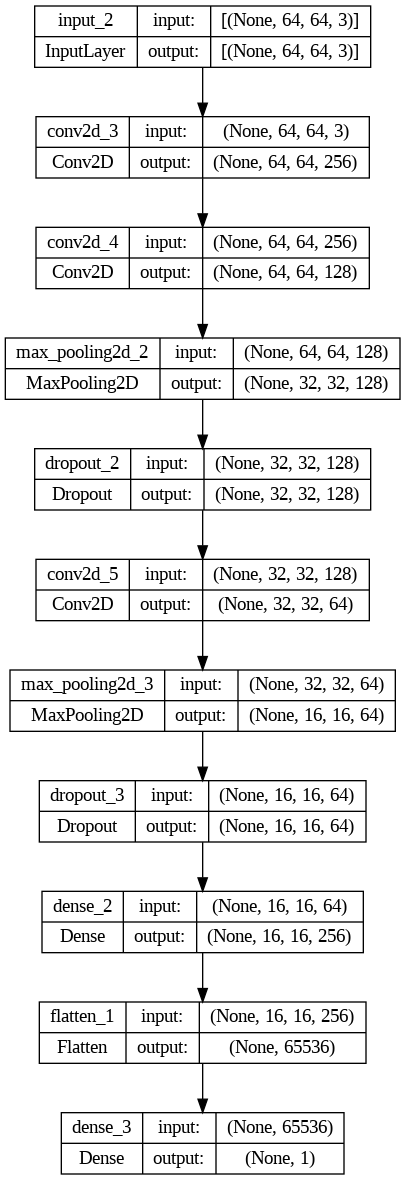

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

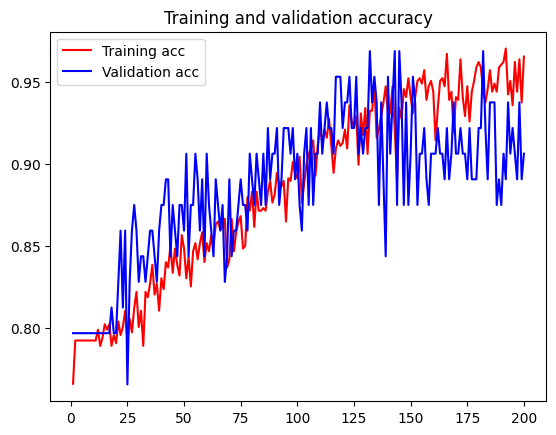

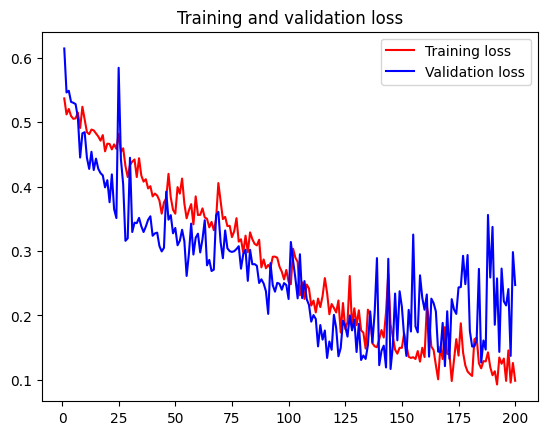

In [ ]:

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

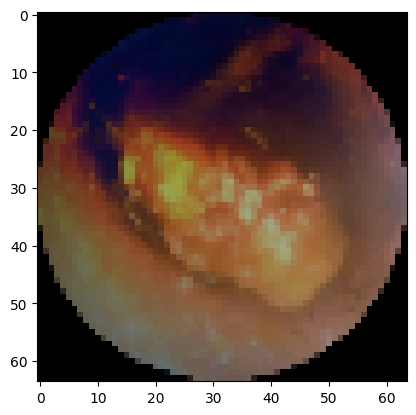

1/1 [==============================] - 0s 152ms/step
earwax (137).png
abnormal


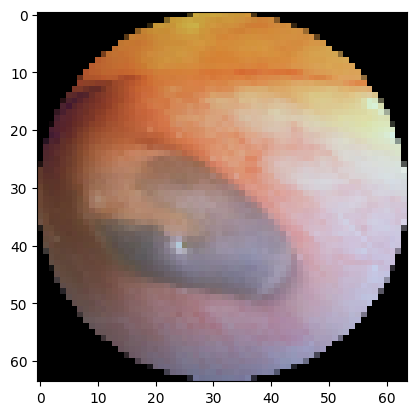

1/1 [==============================] - 0s 45ms/step
normal (132).png
normal


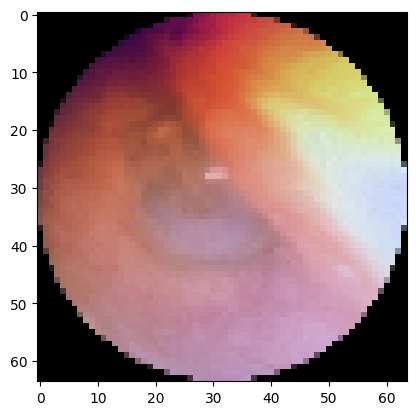

1/1 [==============================] - 0s 46ms/step
normal (311).png
normal


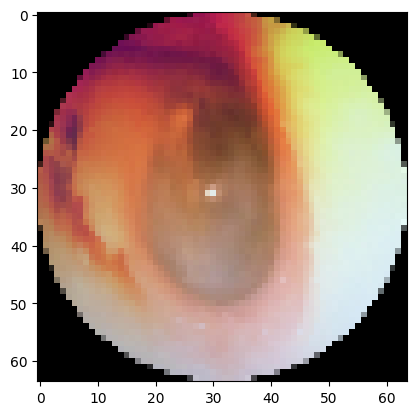

1/1 [==============================] - 0s 43ms/step
normal (588).png
normal


In [ ]:
dir_path = '/content/drive/MyDrive/binary_classification/validation'

# img = image.load_img('/content/drive/MyDrive/ear_data/tympanic_membrane_dataset_2/test/abnormal/aom (11).png')
# plt.imshow(img)

for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i, target_size=(64,64))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X , axis = 0)
  images = np.vstack([X])
  val = model.predict(images)
  print(i)
  if val == 0:
    print("abnormal")
  else:
    print("normal")